# Calculate CMIP Indeces

This file 
1. calculates all the indeces for all months for all cmip models.

    (a). use EC index for nino



In [3]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.sstIndex as sst
import utils.pslIndex as psl
import utils.timePeriod as tp
import utils.compound as compound
import utils.ecIndex as ec
import utils.overlapBins as overlapBins


In [4]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
modelSet=_model.scenarioMip

In [7]:
experimentSet=_model.experimentSet

# 1. Calculate CMIP Indeces

For each experiment in historical, calculate indices

#The heavy lifting - you need the output from this to proceed

run ./cmipECIndeces.py

In [8]:
multipliers={'ACCESS-CM2':[-1,1], 
    'ACCESS-ESM1-5':[-1,-1],
    'AWI-CM-1-1-MR':[-1,-1],
    'BCC-CSM2-MR':[1,1],
    'CAMS-CSM1-0':[1,-1],
    'CAS-ESM2-0':[-1,1],
    'CESM2':[1,1], 
    'CESM2-WACCM':[-1,-1],
    'CIESM':[-1,1], 
    'CMCC-CM2-SR5':[-1,-1],
    'CMCC-ESM2':[-1,-1], 
    'CNRM-CM6-1':[1,1], 
    'CNRM-ESM2-1':[-1,-1], 
    'CanESM5':[-1,-1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[1,1], 
    'EC-Earth3-CC':[1,1], 
    'EC-Earth3-Veg':[-1,1],
    'EC-Earth3-Veg-LR':[1,1], 
    'FIO-ESM-2-0':[1,-1],
    'GFDL-CM4':[1,1], 
    'GFDL-ESM4':[-1,1], 
    'GISS-E2-1-G':[-1,-1],
    'HadGEM3-GC31-LL':[1,-1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,-1], 
    'INM-CM5-0':[-1,1],
    'IPSL-CM6A-LR':[-1,-1], 
    'MCM-UA-1-0':[1,-1], 
    'MIROC-ES2L':[-1,1], 
    'MIROC6':[1,1],
    'MPI-ESM1-2-HR':[1,-1], 
    'MPI-ESM1-2-LR':[-1,-1],
    'MRI-ESM2-0':[1,-1], 
    'NESM3':[-1,1],
    'NorESM2-LM':[1,1], 
    'NorESM2-MM':[1,1], 
    'UKESM1-0-LL':[1,-1] 
    }

ACCESS-CM2
[-1, 1]


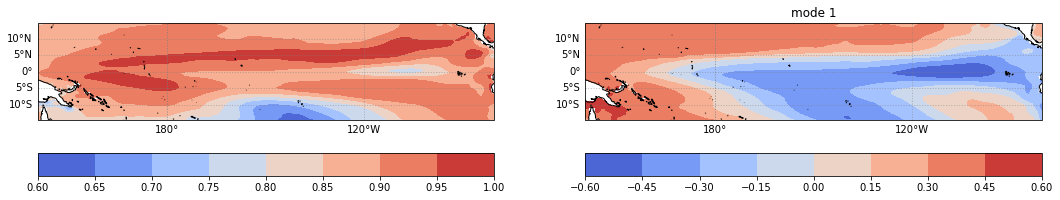

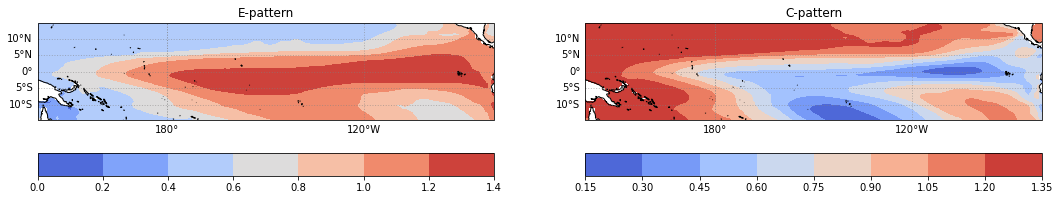

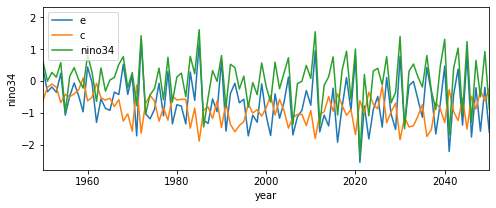

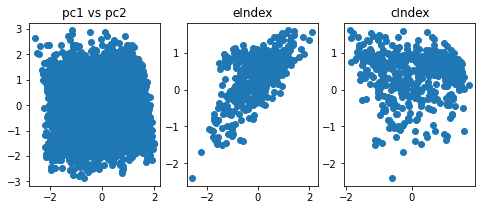

ACCESS-ESM1-5
[-1, -1]


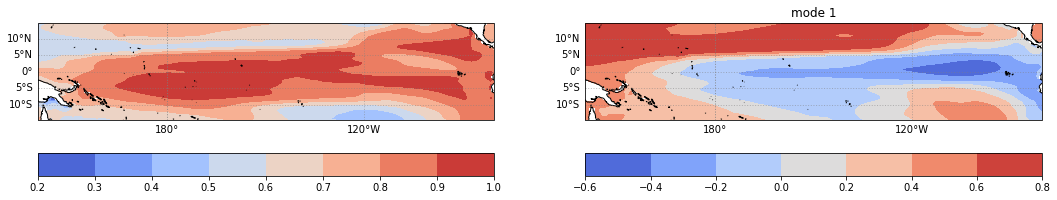

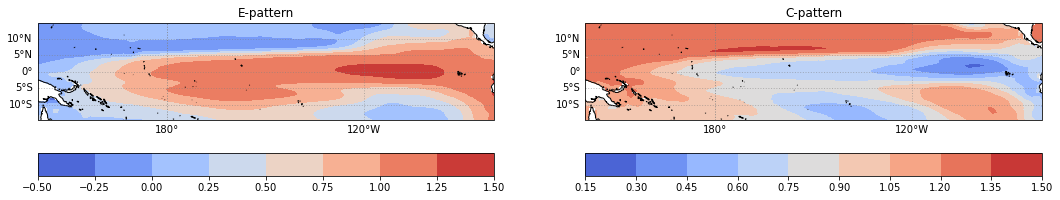

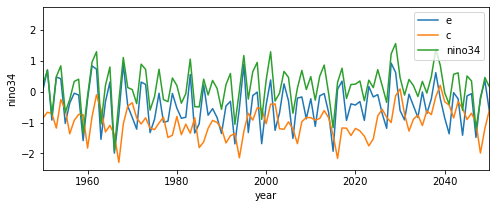

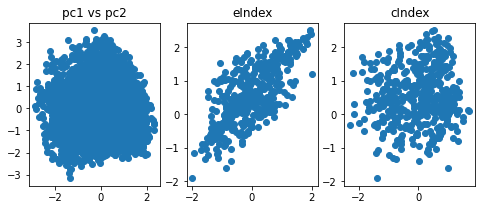

AWI-CM-1-1-MR
[-1, -1]
Cannot print patterns


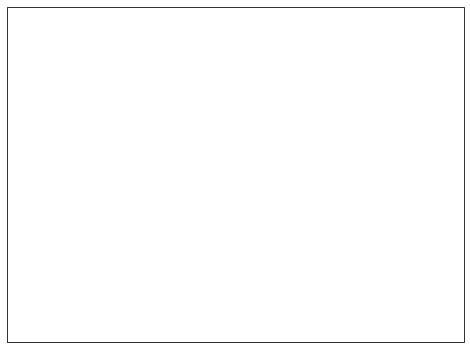

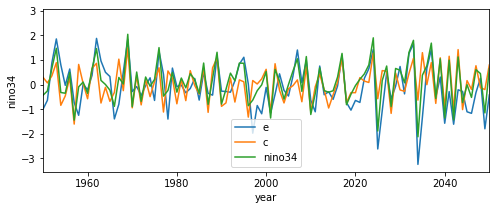

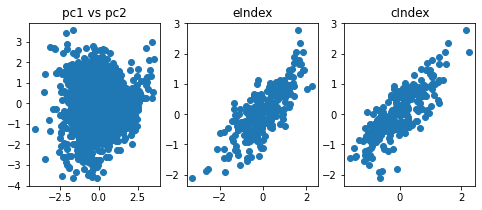

BCC-CSM2-MR
[1, 1]


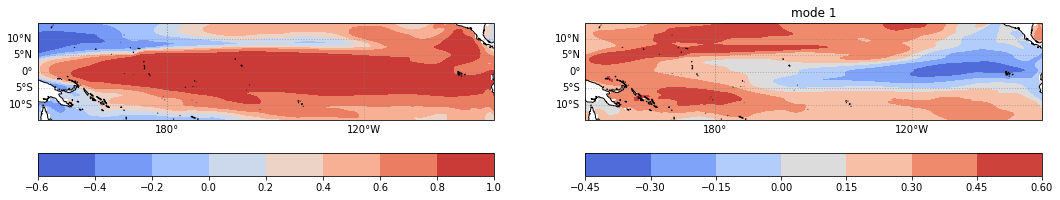

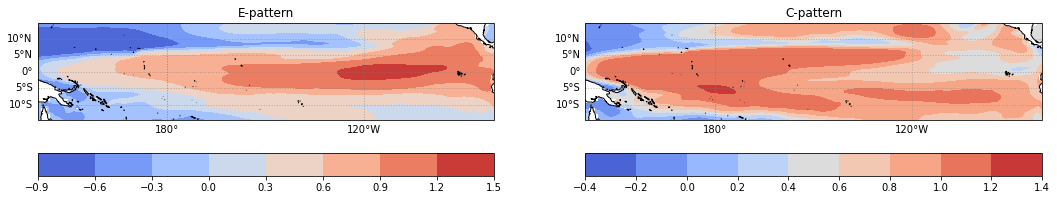

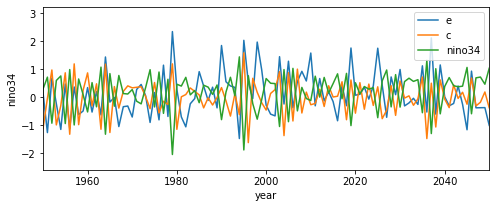

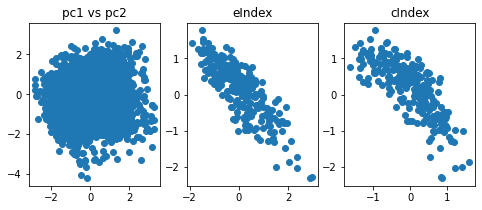

CAMS-CSM1-0
[1, -1]


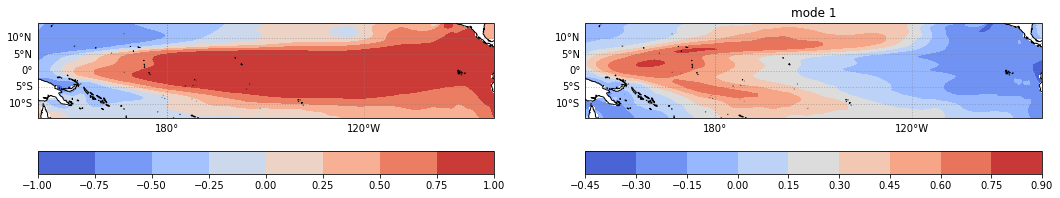

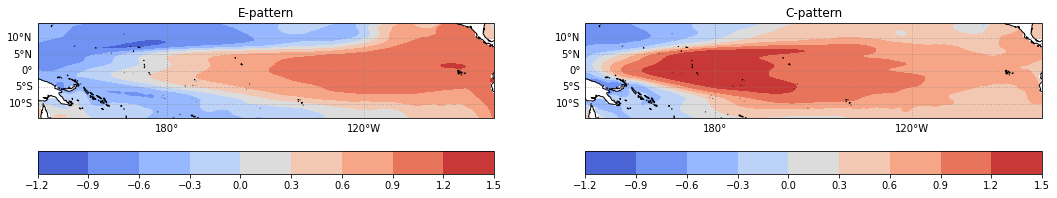

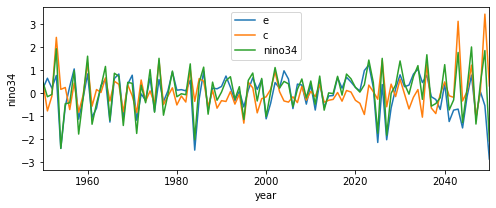

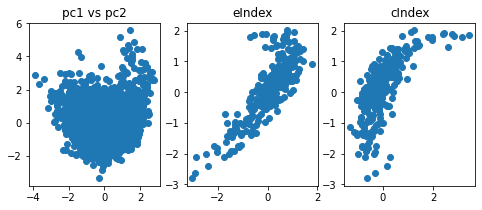

CAS-ESM2-0
[-1, 1]


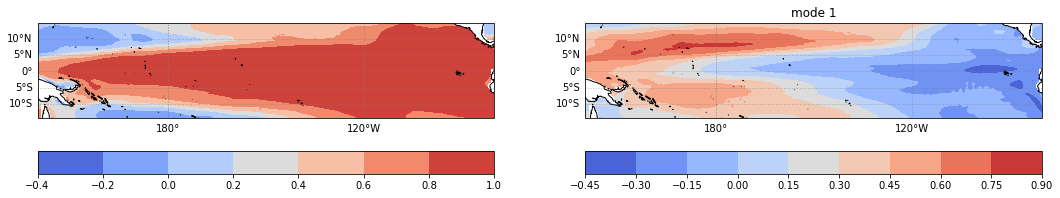

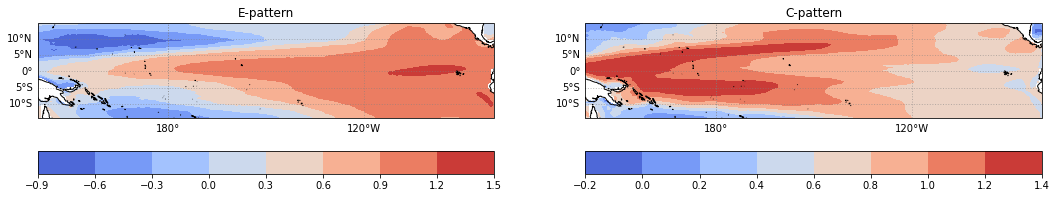

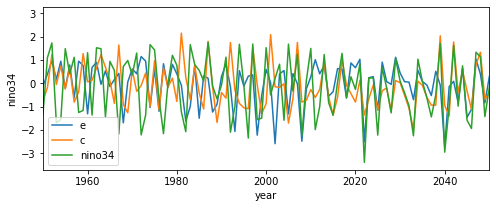

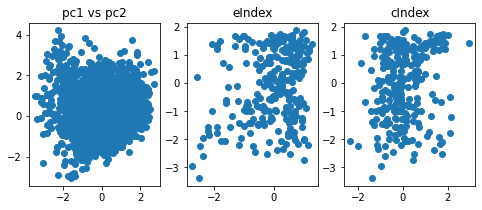

CESM2
[1, 1]


FileNotFoundError: [Errno 2] No such file or directory: b'/home/603/as2285/compound/results/cmipEcIndex/eofCESM2.nc'

In [9]:
for iModel in _model.scenarioMip[:,1]:
    #try:
    
        print(iModel)
        
        multiplyBy=multipliers[iModel]
        
        print(multiplyBy)
        
        indexXr=xarray.Dataset()
        eofsXr=xarray.open_dataarray('results/cmipEcIndex/eof'+iModel+'.nc')
        pcXr = xarray.open_dataset('results/cmipEcIndex/index' + iModel + '.nc')
        tradIndexXr = xarray.open_dataset('results/cmipWarmSeasonIndeces/'+iModel+'tosssp585.nc')
        
        
        indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['model']=iModel
          
        warmSeasXr=tp.averageForTimePeriod(indexXr)
            
        try:
            fig=plt.figure(figsize=(18,12))

            for mode in [0,1]:
                ax=fig.add_subplot(1,2,mode+1,
                               projection=ccrs.Miller(central_longitude=210))
                ec.ensoPlotter(
                    multiplyBy[mode]*eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

            plt.show()

            fig=plt.figure(figsize=(18,12))

            ax=fig.add_subplot(1,2,1,
                           projection=ccrs.Miller(central_longitude=210))

            ec.ensoPlotter(
                multiplyBy[0]*eofsXr.sel(mode=0)-multiplyBy[1]*eofsXr.sel(mode=1),
                ax)

            plt.title("E-pattern")

            ax=fig.add_subplot(1,2,2,
                           projection=ccrs.Miller(central_longitude=210))

            ec.ensoPlotter(multiplyBy[0]*eofsXr.sel(mode=0)+multiplyBy[1]*eofsXr.sel(mode=1), ax)

            plt.title("C-pattern")

            plt.show()
            
        except:
            print('Cannot print patterns')
            
        fig = plt.figure(figsize=(8,3))
        
        warmSeasXr.eIndex.plot()
        warmSeasXr.cIndex.plot()
        tradIndexXr.nino34.plot()
        #tradIndexXr.backgroundSstNoDetrend.plot()
        
        plt.legend(['e','c','nino34'])
        plt.xlim([1950,2050])
        plt.show()
            
        fig = plt.figure(figsize=(8,3))

        plt.subplot(1,3,1)
        plt.scatter(multiplyBy[0]*pcXr.pc1, multiplyBy[1]*pcXr.pc2)
        plt.title('pc1 vs pc2')
        
        plt.subplot(1,3,2)
        plt.scatter(warmSeasXr.eIndex, tradIndexXr.nino34)
        plt.title('eIndex')
        
        plt.subplot(1,3,3)
        plt.scatter(warmSeasXr.cIndex, tradIndexXr.nino34)
        plt.title('cIndex')

        plt.show()

    #except Exception as e:
    #    print('skipping' + iModel ) 
     #   print(e)
    


In [ ]:
multipliersPiControl={'ACCESS-CM2':[-1,-1], 
    'ACCESS-ESM1-5':[1,1],
    'AWI-CM-1-1-MR':[-1,1],
    'BCC-CSM2-MR':[1,-1],
    'CAMS-CSM1-0':[-1,1],
    'CAS-ESM2-0':[1,1],
    'CESM2':[-1,-1], 
    'CESM2-WACCM':[-1,1],
    'CIESM':[-1,-1], 
    'CMCC-CM2-SR5':[1,1],
    'CMCC-ESM2':[-1,1], 
    'CNRM-CM6-1':[1,-1], 
    'CNRM-ESM2-1':[1,1], 
    'CanESM5':[-1,-1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[-1,1], 
    'EC-Earth3-CC':[-1,1], 
    'EC-Earth3-Veg':[-1,1],
    'EC-Earth3-Veg-LR':[-1,-1], 
    'FIO-ESM-2-0':[1,1],
    'GFDL-CM4':[-1,-1], 
    'GFDL-ESM4':[-1,1], 
    'GISS-E2-1-G':[-1,-1],
    'HadGEM3-GC31-LL':[1,1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,1], 
    'INM-CM5-0':[1,-1],
    'IPSL-CM6A-LR':[-1,-1], 
    'MCM-UA-1-0':[1,-1], 
    'MIROC-ES2L':[-1,1], 
    'MIROC6':[-1,-1],
    'MPI-ESM1-2-HR':[1,-1], 
    'MPI-ESM1-2-LR':[-1,1],
    'MRI-ESM2-0':[-1,1], 
    'NESM3':[-1,-1],
    'NorESM2-LM':[1,-1], 
    'NorESM2-MM':[-1,1], 
    'UKESM1-0-LL':[-1,1] 
    }

In [ ]:
for iModel in _model.scenarioMip[:,1]:
    try:
    
        print(iModel)
        
        multiplyBy=multipliersPiControl[iModel]
        
        print(multiplyBy)
        
        indexXr=xarray.Dataset()
        pcXr = xarray.open_dataset('results/cmipEcIndex/indexPiControl' + iModel + '.nc')
        tradIndexXr = xarray.open_dataset('results/cmipWarmSeasonIndeces/'+iModel+'tospiControl.nc')
        
        
        indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['model']=iModel
          
        warmSeasXr=tp.averageForTimePeriod(indexXr)
            
        fig = plt.figure(figsize=(8,3))
        
        warmSeasXr.eIndex.plot()
        warmSeasXr.cIndex.plot()
        tradIndexXr.nino34.plot()
        
        plt.legend(['e','c','nino34'])
        plt.show()
            
        fig = plt.figure(figsize=(8,3))

        plt.subplot(1,2,1)
        
        plt.scatter(warmSeasXr.eIndex, tradIndexXr.nino34)
        plt.title('eIndex')
        
        plt.subplot(1,2,2)
        plt.scatter(warmSeasXr.cIndex, tradIndexXr.nino34)
        plt.title('cIndex')

        plt.show()

    except Exception as e:
        print('skipping' + iModel ) 
    


# Do a warm season av

This grabs the monthly e/c indeces, and calculates the averages for the time periods of interest (aka the warm season), as set in the _indexDefitionions file


The pcs for each month have already been calculated. So loading up the saved versions, and use the multipliers from above to calculate e and c index.

In [ ]:
for experiment in ['piControl','ssp585']: 
    print(experiment)
    indexLs=list()
    warmSeasonLs=list()
    
    if experiment=='piControl':
        startPath='results/cmipEcIndex/indexPiControl'
        multipliExp=multipliersPiControl
    elif experiment=='ssp585':
        startPath='results/cmipEcIndex/index'
        multipliExp=multipliers

    for model in _model.scenarioMip[:,1]:
        try:
            multiplyBy=multipliExp[model]
            indexXr=xarray.Dataset()
            pcXr = xarray.open_dataset(startPath + model + '.nc')
            indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
            indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
            indexXr['model']=iModel
            indexLs.append(indexXr)
            
            warmSeasXr=tp.averageForTimePeriod(indexXr)
            warmSeasXr['model']=model
            warmSeasonLs.append(warmSeasXr)
            
        except Exception as e:
            print('skipping' + model + experiment) 
    
    #save the monthly e and c index incase they are needed
    multiIndexXr=xarray.concat(indexLs, 'model')
    multiIndexXr.to_netcdf('results/cmip6'+experiment+'EcIndexMonth.nc')
    
    #save the warm season e and c index too
    results=xarray.concat(warmSeasonLs, 'model')
    results=results.assign_attrs({'experiment':experiment,**indexXr.attrs})
    results.to_netcdf('results/cmip6'+experiment+'EcIndex.nc')

# Some sanity checks to see if it looks ok:


In [ ]:
results=xarray.open_dataset('results/cmip6ssp585EcIndex.nc').sel(year=slice(1850,2099))

In [ ]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

results.isel(model=35).eIndex.plot(label='e')
results.isel(model=35).cIndex.plot(label='c')

#Tidy up a bit
plt.minorticks_on()
plt.legend()

In [ ]:
# A multi-model mean?

meanE = results.eIndex.mean(dim='model')
meanC = results.cIndex.mean(dim='model')

In [ ]:
meanE.plot()
meanC.plot()

# 2. Calculate Compound Years for CESM6

# Find events in the e and c indeces

 1 sigma above/below mean
Using a piControl climatology

In [ ]:
piControlEcXr=xarray.open_dataset('results/cmip6piControlEcIndex.nc')


# This should calculate stds for all experiments and all indeces
stdEcXr = piControlEcXr.std(dim='year')
stdEcXr

In [ ]:
#merge the experiments into one XR for convenience
ecIndexXr=xarray.concat([
    xarray.open_dataset('results/cmip6'+experiment+'EcIndex.nc') for experiment in ['piControl','ssp585']], 
'experiment')

ecIndexXr['experiment']=['piControl','ssp585']

In [ ]:
ecIndexXr

Apply the 1 sigma criteria

In [ ]:
firePosEc, fireNegEc = compound.applyCriteria(ecIndexXr, stdEcXr)

In [ ]:
# find where either index is saying there is an event
# this is a bit messy, you need to make sure Nan years stay as Nan (years for the piControl is different for all the models)

firePosEc['ecCombined']=(((firePosEc.cIndex+firePosEc.eIndex)>0)*1).where(
        firePosEc.cIndex.isnull()==False)
fireNegEc['ecCombined']=(((fireNegEc.cIndex+fireNegEc.eIndex)>0)*1).where(
    fireNegEc.cIndex.isnull()==False)


In [ ]:
firePosEc.sel(experiment='piControl',model='CESM2')

In [ ]:
#Find events in the trad indeces

In [ ]:
tradIndecesXr = xarray.concat([
    xarray.open_dataset('results/cmip6'+experiment+'TradIndecesTos.nc') for experiment in ['piControl','ssp585']], 
'experiment')

tradIndecesXr['experiment']=['piControl','ssp585']



In [ ]:
piControlXr=xarray.open_dataset('results/cmip6piControlTradIndecesTos.nc')

piControlXr.model.values

In [ ]:
# This should calculate stds for all experiments and all indeces
stdXr = piControlXr.std(dim='year')

# define some criteria that we want to use to identifiy it thats an event
criteriaXr= xarray.merge(
    (stdXr['nino34'], stdXr['nino4'], stdXr['dmi'], stdXr['eastIO'],  stdXr['sam']/2)
)

In [ ]:
firePosTrad, fireNegTrad = compound.applyCriteria(tradIndecesXr, criteriaXr)


Now we can merge the events from each method

In [ ]:
firePos=xarray.merge([firePosEc,firePosTrad])
fireNeg=xarray.merge([fireNegEc,fireNegTrad])

In [ ]:
firePos

In [ ]:
firePosBinnedXr=overlapBins.binSum(firePos.sel(experiment='ssp585', year=slice(1850,2100),drop=True))

In [ ]:
firePosBinnedXr

In [ ]:
binSumLs = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        print(iModel)

        piCModelXr=firePos.sel(experiment='piControl', drop=True).sel(model=iModel)
        
        binSumXr=overlapBins.binSum(piCModelXr.where(piCModelXr.isnull()==False, drop=True))
        
        binSumLs.append(binSumXr)
        
    except Exception as e:
        print(e)
        
piControlBinnedXr = xarray.concat(binSumLs, 'model')

In [ ]:
piControl[['cIndex','eIndex','ecCombined','nino34','nino4']].sel(model='CESM2')

# Calculate the compounding years and plot an example

In [ ]:
%run utils/emergence.ipynb
for iModel in firePosBinnedXr.model.values:
    print(iModel)
    emergePlot(firePosBinnedXr[['ecCombined','nino34']].sel(model=iModel,drop=True),
    piControlBinnedXr[['ecCombined','nino34']].sel(model=iModel,drop=True)
          )
    plt.show()

In [ ]:
%run utils/emergence.ipynb
for iModel in firePosBinnedXr.model.values:
    print(iModel)
    emergePlot(firePosBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']].sel(model=iModel,drop=True),
    piControlBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']].sel(model=iModel,drop=True)
          )
    plt.show()

In [ ]:
allCompoundsXr=xarray.concat([
    compound.compound(firePos),
    compound.compound(fireNeg)],
    'fire')

allCompoundsXr['fire']=['pos','neg']

allCompoundsXr.to_netcdf('results/cmip6EcCompounds.nc')

In [ ]:
allCompoundsXr.eIndexDmiSam.sel(model='CIESM')

In [ ]:
firePosCompound=allCompoundsXr.ecCombinedDmiSam.to_dataset('compound').sel(model='CIESM', experiment='ssp585', fire='pos', drop=True)

toPlot=3*firePosCompound.all3

plt.figure(figsize=(12,12))

plt.vlines(
    x=firePosCompound.year, 
    ymin=0,
    ymax=toPlot,
    label='all3'
)

colors=['orange', 'purple', 'green']
iCol = 0

for iPair in allCompoundsXr.attrs['pairs']:
    plt.vlines(
        x=firePosCompound.year, 
        ymin=0,
        ymax=2*firePosCompound[iPair],
        color=colors[iCol],
        label=iPair
    )
    iCol+=1
plt.legend()
plt.xlim(1850,2100)
plt.title('CIESM'+': Pairs and all-three compounds for individal years')